# Sentiment Analysis and Zero-Shot Classification

In [4]:
# conda install -c conda-forge transformers

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/ferratan/opt/anaconda3

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39h6e9494a_1         969 KB  conda-forge
    huggingface_hub-0.10.1     |     pyhd8ed1ab_0         114 KB  conda-forge
    ninja-1.10.2               |       hecd8cb5_5           9 KB
    ninja-base-1.10.2          |       haf03e11_5         118 KB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    pytorch-1.10.2             |cpu_py39h903acac_0        53.9 MB
    sacremoses-0.0.53          |     pyhd8ed1ab_0         427 KB  conda-forge
    tokenizers-0.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/Users/ferratan/Downloads/MossOut.csv', index_col = [0])

# Sentiment Analysis

In [3]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

[{'label': 'Positive', 'score': 0.9649670124053955}]

In [5]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


## Zero Shot Classificaiton

In [6]:
import transformers
from transformers import pipeline

In [7]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [15]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': '[This review was collected as part of a promotion.] This is a grear product. We have used different brands earlier but this one was great. It helped in changing out backyard. Highly recommended.',
 'labels': ['effective',
  'quality',
  'cheap',
  'efficient',
  'affordability',
  'ease of use',
  'cost',
  'functionality',
  'satisfaction',
  'delivery',
  'expensive',
  'complaints',
  'faulty',
  'defective'],
 'scores': [0.9982118010520935,
  0.9970576167106628,
  0.9797047972679138,
  0.9723241329193115,
  0.915959358215332,
  0.9100281596183777,
  0.8241082429885864,
  0.6835179328918457,
  0.661558985710144,
  0.44441667199134827,
  0.054540641605854034,
  0.004163677804172039,
  0.0008530390332452953,
  0.00026743949274532497]}

In [16]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': '[This review was collected as part of a promotion.] I dont know how long it should take to work but it doesnt seem to be working. We have a moss problem on the south side of our home. I had my partner apply this to the effected area last week per the instructions on the bottle but it actually seems like there is more moss than before. Or its greener. Were gonna give it another week before we try something more high powered.',
 'labels': ['faulty',
  'cost',
  'quality',
  'complaints',
  'cheap',
  'functionality',
  'defective',
  'expensive',
  'ease of use',
  'delivery',
  'satisfaction',
  'efficient',
  'affordability',
  'effective'],
 'scores': [0.9802309274673462,
  0.8941304087638855,
  0.8865416049957275,
  0.8290219306945801,
  0.7636889219284058,
  0.716784656047821,
  0.6248000264167786,
  0.515829861164093,
  0.4121343195438385,
  0.3196192979812622,
  0.2847721576690674,
  0.2702045142650604,
  0.1995008885860443,
  0.1372622400522232]}

In [17]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': '[This review was collected as part of a promotion.] I was skeptical about using this because nothing works on my grass, but this did. It took the moss away and grass is growing now!',
 'labels': ['effective',
  'efficient',
  'quality',
  'functionality',
  'satisfaction',
  'cheap',
  'cost',
  'delivery',
  'affordability',
  'expensive',
  'ease of use',
  'complaints',
  'faulty',
  'defective'],
 'scores': [0.998035192489624,
  0.95330810546875,
  0.9405019283294678,
  0.7023308277130127,
  0.5737557411193848,
  0.5560637712478638,
  0.4771696925163269,
  0.2209593504667282,
  0.2150791734457016,
  0.21433117985725403,
  0.12254331260919571,
  0.10696989297866821,
  0.05356576293706894,
  0.011253343895077705]}

In [18]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': 'killed a little bit but no where near all of it',
 'labels': ['cost',
  'defective',
  'faulty',
  'functionality',
  'effective',
  'affordability',
  'efficient',
  'delivery',
  'expensive',
  'complaints',
  'quality',
  'cheap',
  'ease of use',
  'satisfaction'],
 'scores': [0.7659798860549927,
  0.568946361541748,
  0.5396653413772583,
  0.39302143454551697,
  0.36093369126319885,
  0.3574143052101135,
  0.3192466199398041,
  0.2990844249725342,
  0.2776084542274475,
  0.2255634218454361,
  0.12636873126029968,
  0.07338748127222061,
  0.06977254897356033,
  0.051340654492378235]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [19]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [20]:
# insert the labels you identified from above section
type = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective']

In [21]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [22]:
# create a "max" column for metric purposes
df['max'] = df[['affordability_m', 'quality_m', 'complaints_m', 'satisfaction_m', 'delivery_m', 'ease of use_m', 'cost_m', 'efficient_m', 'functionality_m', 'cheap_m', 'expensive_m', 'effective_m', 'faulty_m', 'defective_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,sentiment,affordability_m,quality_m,complaints_m,satisfaction_m,delivery_m,ease of use_m,cost_m,efficient_m,functionality_m,cheap_m,expensive_m,effective_m,faulty_m,defective_m,max
9484,Garden,70181,MOSS OUT! For Roofs & Walks 27 oz. Ready To Spray,http://www.homedepot.com/p/100598513,Homedepot,MossOut,100598513,100598513,No,2021-12-30T00:00:00,2021,12,52,Does the job,[This review was collected as part of a promot...,syndicated reviews,0.00,3,0,0,0,Yes,[this review was collected as part of a promot...,2021-12-30,Neutral,0.287298,0.801785,0.102907,0.327620,0.187908,0.663477,0.489835,0.522202,0.714873,0.321070,0.104820,0.939498,0.023604,0.005137,0.939498
1733,Garden,13763,MOSS OUT! Plus Fertilizer For Lawns 20-0-5 20 ...,http://www.homedepot.com/p/t/203419243,Homedepot,MossOut,203419243,203419243,No,2021-06-01T00:00:00,2021,6,22,great product,[This review was collected as part of a promot...,syndicated reviews,18.48,4,0,0,0,Yes,[this review was collected as part of a promot...,2021-06-01,Positive,0.962197,0.996654,0.002285,0.638618,0.407897,0.870549,0.796816,0.952581,0.592192,0.986001,0.069175,0.997696,0.001042,0.000259,0.997696
9984,Garden,70681,MOSS OUT! For Roofs & Walks 27 oz. Liquid Conc...,https://www.lowes.com/pd/Moss-Out-27-oz-Concen...,Lowes,MossOut,3804581,3804581,No,2021-12-02T00:00:00,2021,12,48,Not sure about this,[This review was collected as part of a promot...,syndicated reviews,15.78,3,0,0,0,Yes,[this review was collected as part of a promot...,2021-12-02,Negative,0.183240,0.869463,0.880110,0.346412,0.303530,0.360083,0.901363,0.212513,0.697171,0.747386,0.462476,0.118492,0.976775,0.710727,0.976775


In [26]:
#assign the max to its aligned type
align_list=[]
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      align_list.append(t)
      
df['align_type']=align_list

In [24]:
import seaborn as sns

In [27]:
# Create Pivot table for the Heatmap
table = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc=np.mean,fill_value=0)
table

align_type,cheap,complaints,cost,defective,delivery,ease of use,effective,efficient,expensive,faulty,functionality,quality
sentiment,,,,,,,,,,,,
Negative,0.000000,0.549757,0.627366,0.969578,0.000000,0.998128,0.964155,0.983710,0.914770,0.956529,0.832035,0.920809
Neutral,0.984835,0.000000,0.000000,0.972001,0.960847,0.928641,0.974952,0.983645,0.700817,0.836986,0.693917,0.919542
Positive,0.996584,0.000000,0.000000,0.000000,0.000000,0.997408,0.994220,0.997336,0.000000,0.901774,0.000000,0.978980


<Figure size 864x360 with 0 Axes>

[Text(0.5, 17.5, ''), Text(80.5, 0.5, '')]

[Text(0.5, -49.875, ''), Text(80.5, 0.5, '')]

[Text(0.5, -49.875, ''), Text(80.5, 0.5, '')]

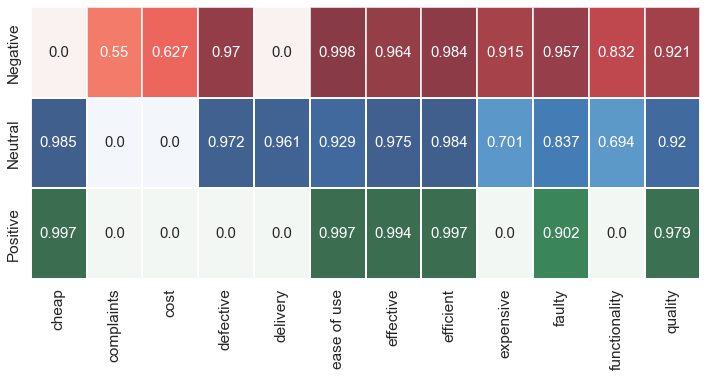

In [28]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Metric and Sanity Check

[Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0

0.975

['[this review was collected as part of a promotion.] this is a grear product. we have used different brands earlier but this one was great. it helped in changing out backyard. highly recommended.']

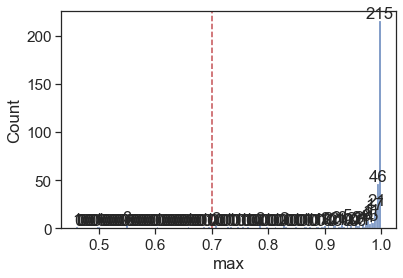

In [29]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [30]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1558 to 24093
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   segment               36 non-null     object 
 1   review_id             36 non-null     int64  
 2   product_name          36 non-null     object 
 3   producturl            36 non-null     object 
 4   retailer              36 non-null     object 
 5   brand                 36 non-null     object 
 6   retailer_product_id   36 non-null     object 
 7   base_id               36 non-null     object 
 8   variants_flag         36 non-null     object 
 9   review_creation_date  36 non-null     object 
 10  year                  36 non-null     int64  
 11  month                 36 non-null     int64  
 12  week                  36 non-null     int64  
 13  review_title          36 non-null     object 
 14  review_text           36 non-null     object 
 15  review_type        

In [31]:
len(df_uncat)

36

In [ ]:
#df_uncat.to_csv('data/unlabeld_data.csv')